# Content with notebooks

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

## Markdown + notebooks

As it is markdown, you can embed images, HTML, etc into your posts!

![](https://myst-parser.readthedocs.io/en/latest/_static/logo-wide.svg)

You can also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{aligned}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{aligned}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep!

## MyST markdown

MyST markdown works in Jupyter Notebooks as well. For more information about MyST markdown, check
out [the MyST guide in Jupyter Book](https://jupyterbook.org/content/myst.html),
or see [the MyST markdown documentation](https://myst-parser.readthedocs.io/en/latest/).

## Code blocks and outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

In [4]:
from myst_nb import glue
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
plt.rcParams['font.size']=20

#import matplotlib
#matplotlib.use('svg')

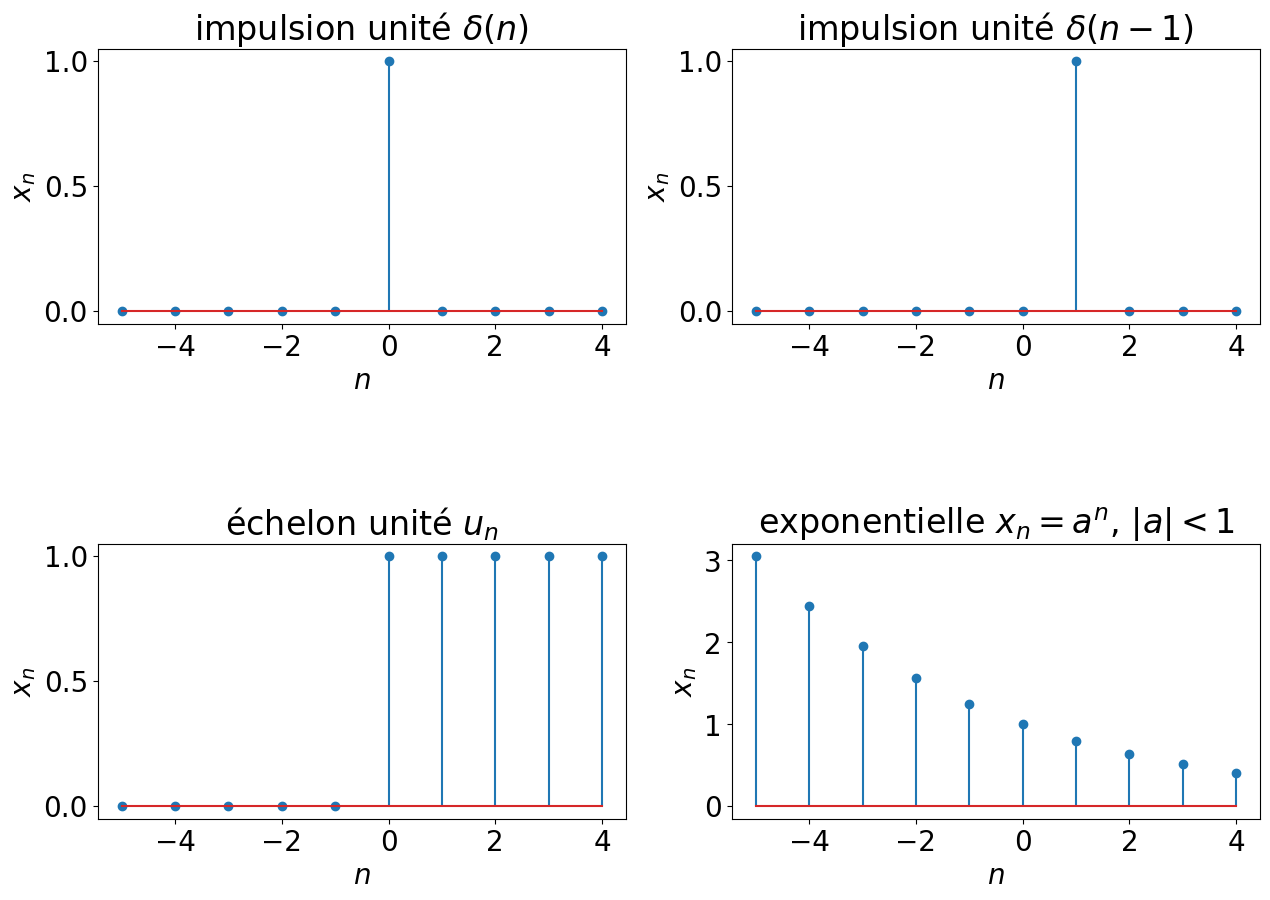

In [3]:
# SIGNAUX de base


fig,ax = plt.subplots(2,2,figsize=(15,10))
# impulsion
y = np.zeros(10); y[5]=1
x= range(-5,5)

ax[0,0].stem(x,y)
ax[0,0].set_xlabel(r'$n$')
ax[0,0].set_ylabel(r'$x_n$')
ax[0,0].set_title('impulsion unité $\delta(n)$')

# impulsion
y = np.zeros(10); y[6]=1
x= range(-5,5)

ax[0,1].stem(x,y)
ax[0,1].set_xlabel(r'$n$')
ax[0,1].set_ylabel(r'$x_n$')
ax[0,1].set_title('impulsion unité $\delta(n-1)$')


# échelon
y = np.zeros(10); y[5:]=1
x= range(-5,5)

ax[1,0].stem(x,y)
ax[1,0].set_xlabel(r'$n$')
ax[1,0].set_ylabel(r'$x_n$')
ax[1,0].set_title('échelon unité $u_n$')

# exponentielle/géométrique
a=0.8
x= np.arange(-5,5)
y = a**x

ax[1,1].stem(x,y)
ax[1,1].set_xlabel(r'$n$')
ax[1,1].set_ylabel(r'$x_n$')
ax[1,1].set_title('exponentielle $x_n=a^n$, $|a|<1$')


plt.subplots_adjust(hspace=0.8)
glue("fig_signal_elementary", fig, display=False)

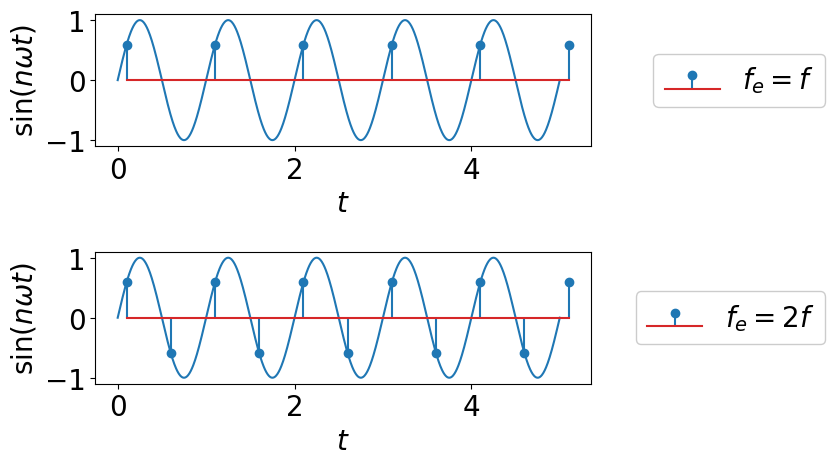

In [30]:
# SHANNON-NYQUIST SAMPLING THEOREM, EXAMPLE

fig,ax = plt.subplots(2,1)#,figsize=(15,10)
# sinus
T= 1
omega = 2*np.pi/T
t= np.linspace(0,5*T,1000)
n=1
y = np.sin(n*omega*t); 

# sinus ech
t_e= np.linspace(0,5*T,6)+0.1
y_e = np.sin(n*omega*t_e); 

# sinus ech
t_e2= np.linspace(0,5*T,11)+0.1
y_e2 = np.sin(n*omega*t_e2); 


ax[0].plot(t,y)
ax[0].stem(t_e,y_e, label=r"$f_e=f$")
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$\sin(n \omega t)$')
ax[0].legend(framealpha=0.99, loc= 'center right', bbox_to_anchor=(1.5, 0.5) )

ax[1].plot(t,y)
ax[1].stem(t_e2,y_e2,label=r"$f_e=2 f$")
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$\sin(n \omega t)$')
ax[1].legend(framealpha=0.99, loc= 'center right' , bbox_to_anchor=(1.5, 0.5))
#ax[0].set_title('éc')

plt.subplots_adjust(hspace=0.8)
glue("fig_sine_shannon", fig, display=False)

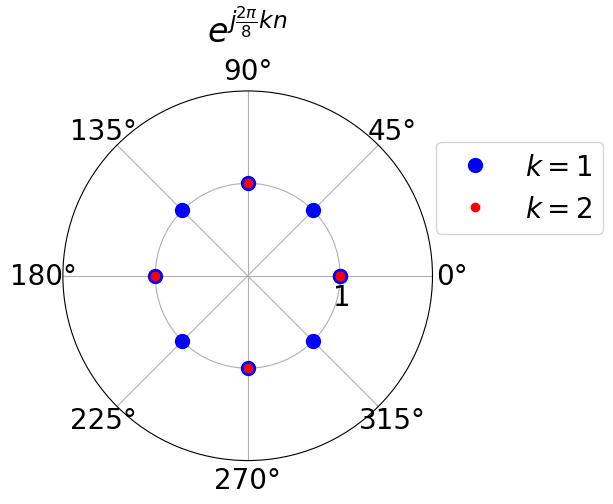

In [59]:
import numpy as np
import matplotlib.pyplot as plt


r = np.ones(9)
theta =np.linspace(0, 2*np.pi, 9)

r2 = np.ones(5)
theta2 =np.linspace(0, 2*np.pi, 5)



fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r,  "bo",label=r'$k=1$',ms=10)
ax.plot(theta2, r2,  "ro",label=r'$k=2$',ms=6)

ax.set_rmax(2)
#ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rticks([1])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title(r"$e^{j\frac{2\pi}{8}kn}$", va='bottom')
ax.legend(bbox_to_anchor=(1.5, 0.9))
plt.show()


#plt.subplots_adjust(hspace=0.8)
glue("fig_ej2pi_n", fig, display=False)

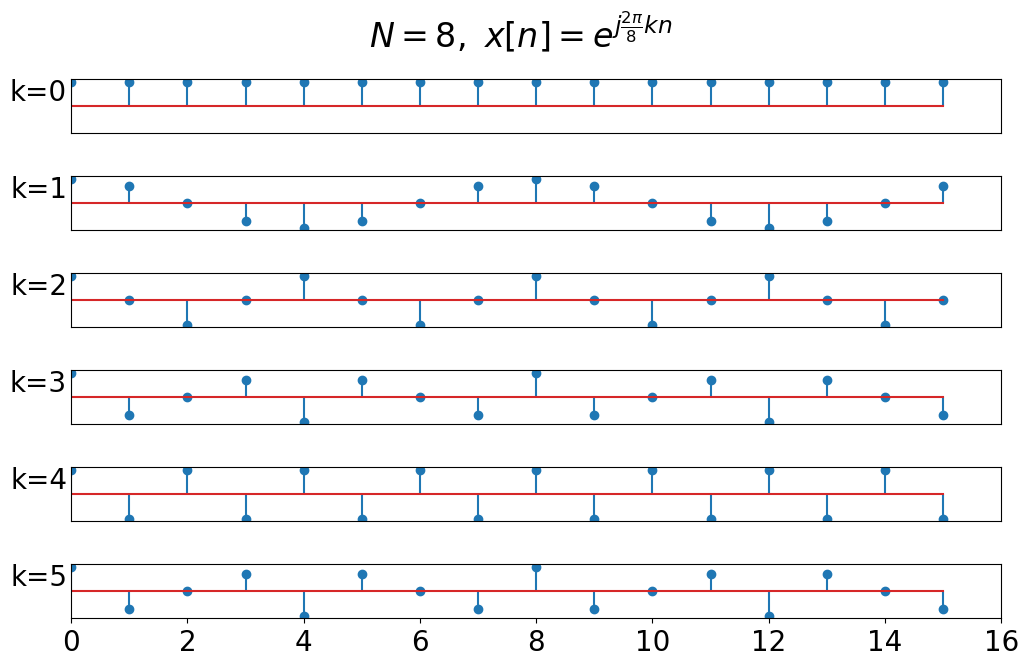

In [40]:
#SUITES EXPONENTIELLES COMPLEXES
# k augmente

k_l = [0,1,2,3,4,5]
N = 8
n_l= np.arange(0,2*N)

fig,ax = plt.subplots(6,1,figsize=(12,7))

for k in k_l:
    ax[k].stem(n_l,np.cos(2*np.pi/N * k *n_l))
    ax[k].set_xlim([0,2*N])
    ax[k].set_ylim([-1.1,1.1])
    ax[k].set_yticks([])
    ax[k].set_ylabel('k={}'.format(k), rotation=0, labelpad = 20)
    if k<k_l[-1]: ax[k].set_xticks([])
        
    
plt.subplots_adjust(hspace=0.8)
fig.suptitle(r"$N=8, ~x[n]=e^{j\frac{2\pi}{8}kn}$")
glue("fig_ej2pi_kn", fig, display=False)

In [31]:
?plt.title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


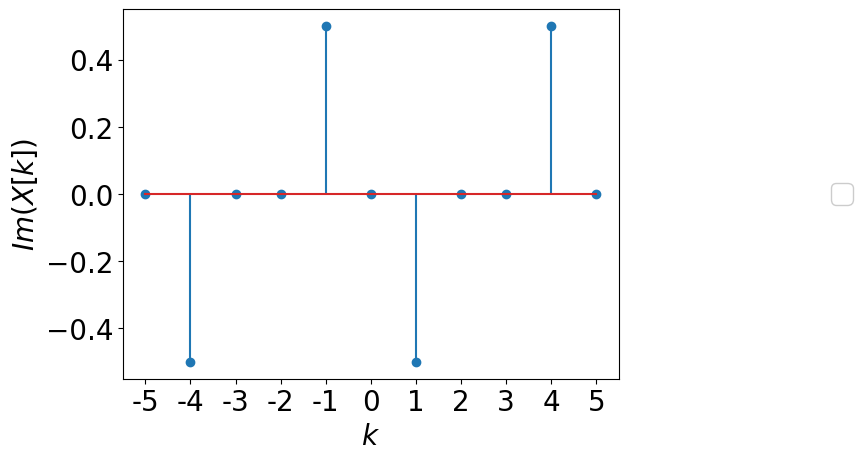

In [42]:
# SERIE DE FOURIER DISCRETE
# SINUS

fig,ax = plt.subplots(1,1)#,figsize=(15,10)

k = np.arange(-5,6)
Xk = -np.array([0,1/2,0,0,-1/2,0,1/2,0,0,-1/2,0])

ax.stem(k,Xk )
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$Im (X[k])$')
ax.set_xticks(k, k)
ax.legend(framealpha=0.99, loc= 'center right', bbox_to_anchor=(1.5, 0.5) )

glue("fig_spectre_sin_discr", fig, display=False)



In [ ]:
# SERIE FOURIER DISCRETE
# RECONSTRUCTION/APPROXIMATION



Text(0, 0.5, '$|V[k]|^2$')

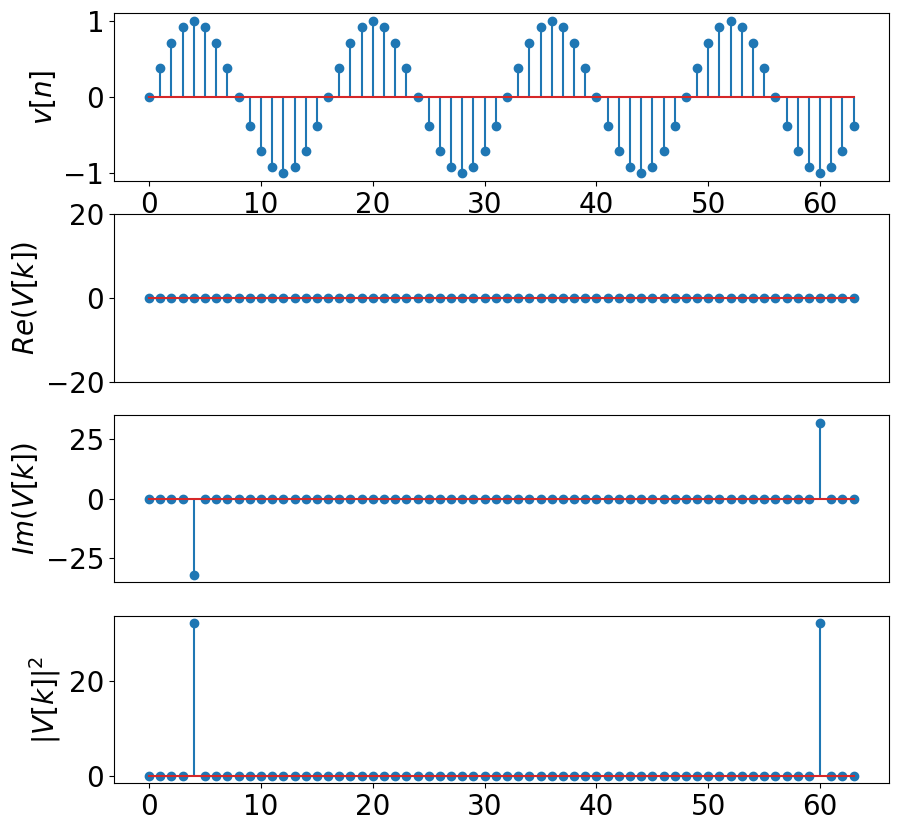

In [15]:
# SERIE FOURIER DISCRETE
# ANALYSE, cf Opp 10 chap 10
# MATCHED FREQUENCY k=4
from scipy.fft import fft, ifft, fftfreq, fftshift

n=np.arange(64)
vn = np.sin(2*np.pi/16*n)

Vk=fft(vn)

fig,ax = plt.subplots(4,1,figsize=(10,10))
ax[0].stem(vn)
ax[0].set_ylabel(r'$v[n]$')
ax[1].stem(np.real(Vk))
ax[1].set_xticks([])
ax[1].set_ylabel(r'$Re(V[k])$')
ax[1].set_ylim([-20,20])
ax[2].stem(np.imag(Vk))
ax[2].set_xticks([])
ax[2].set_ylabel(r'$Im(V[k])$')
ax[3].stem(np.abs(Vk))
ax[3].set_ylabel(r'$|V[k]|^2$')


glue("fig_fft_sin_match", fig, display=False)


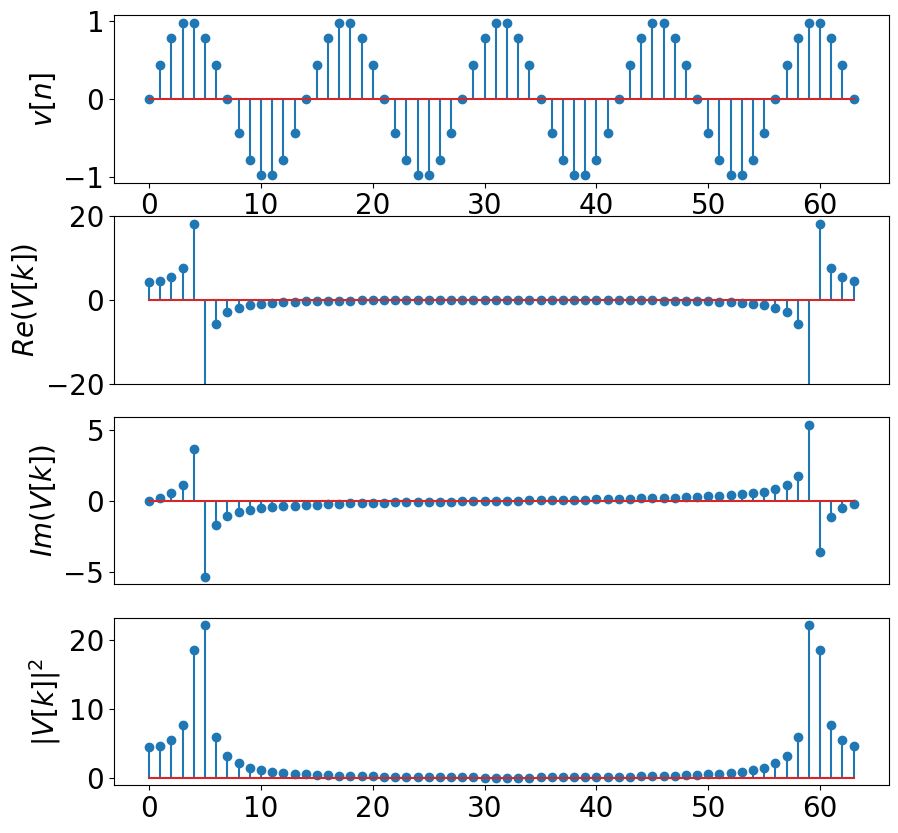

In [17]:
# SERIE FOURIER DISCRETE
# ANALYSE, cf Opp 10 chap 10
# NO MATCHING FREQUENCY 
from scipy.fft import fft, ifft, fftfreq, fftshift

n=np.arange(64)
#vn = np.cos(2*np.pi/14*n) #+ 0.75*np.cos(4*np.pi/15*n)
vn = np.sin(2*np.pi/14*n) #+ 0.75*np.cos(4*np.pi/15*n)
#vn = np.sin(2*np.pi/16*n)

Vk=fft(vn)

fig,ax = plt.subplots(4,1,figsize=(10,10))
ax[0].stem(vn)
ax[0].set_ylabel(r'$v[n]$')
ax[1].stem(np.real(Vk))
ax[1].set_xticks([])
ax[1].set_ylabel(r'$Re(V[k])$')
ax[1].set_ylim([-20,20])
ax[2].stem(np.imag(Vk))
ax[2].set_xticks([])
ax[2].set_ylabel(r'$Im(V[k])$')
ax[3].stem(np.abs(Vk))
ax[3].set_ylabel(r'$|V[k]|^2$')


glue("fig_fft_sin_nomatch", fig, display=False)

-26.21019246392336
-3.6903957562927046
0.9487961422859597
0.8289994346553051


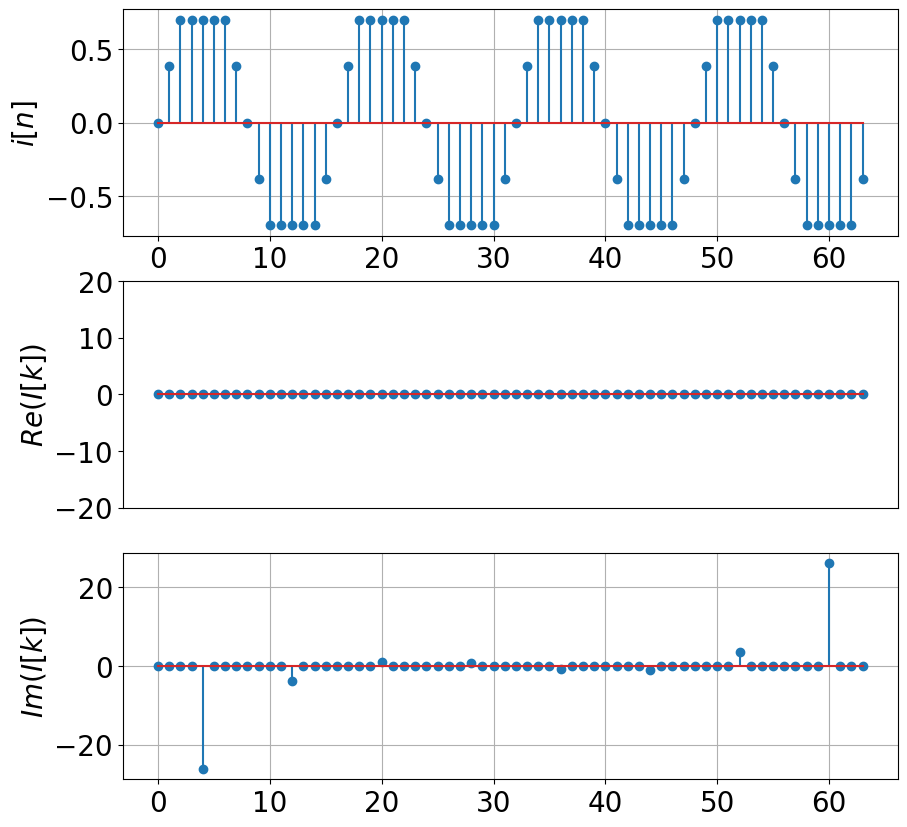

In [9]:
# SERIE FOURIER DISCRETE:
# TOTAL HARMONIC DISTORSION
# 
# MATCHED FREQUENCY k=4
from scipy.fft import fft, ifft, fftfreq, fftshift

n=np.arange(64)
vn = np.sin(2*np.pi/16*n)
thr=0.7
idx_vn_pos = vn>thr
idx_vn_neg = vn<-thr
vn[idx_vn_pos]=thr
vn[idx_vn_neg]=-thr

Vk=fft(vn)

fig,ax = plt.subplots(3,1,figsize=(10,10))
ax[0].stem(vn)
ax[0].set_ylabel(r'$i[n]$')
ax[0].grid(True,which='both')
ax[1].stem(np.real(Vk))
ax[1].set_xticks([])
ax[1].set_ylabel(r'$Re(I[k])$')
ax[1].set_ylim([-20,20])
ax[2].stem(np.imag(Vk))
#ax[2].set_xticks([])
ax[2].set_ylabel(r'$Im(I[k])$')
ax[2].grid(True)

glue("fig_sin_THD", fig, display=False)

print(np.imag(Vk[4]))
print(np.imag(Vk[12]))
print(np.imag(Vk[20]))
print(np.imag(Vk[28]))

-12.065614781102035
-3.5918538303971737
-1.6036287310063182
-0.47738968171118046


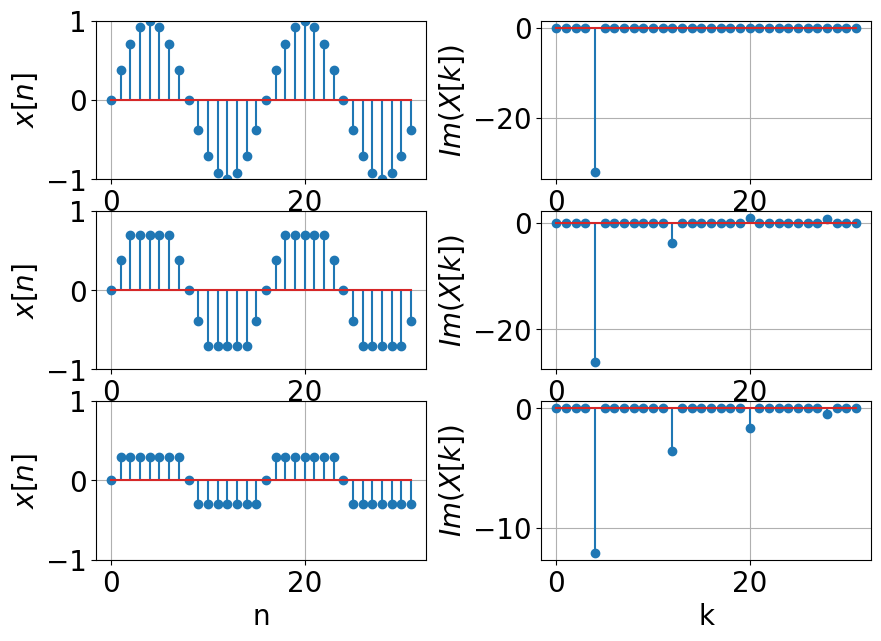

In [14]:
# SERIE FOURIER DISCRETE:
# TOTAL HARMONIC DISTORSION, WITH MORE & MORE DISTORSION
# 
# MATCHED FREQUENCY k=4
from scipy.fft import fft, ifft, fftfreq, fftshift

N=64
n=np.arange(N)
vn = np.sin(2*np.pi/16*n)

fig,ax = plt.subplots(3,2,figsize=(10,7))
thr_l=[1.0,0.7,0.3]
n_thr=len(thr_l)
for i,thr in enumerate(thr_l):
    # truncate
    #thr=0.7
    idx_vn_pos = vn>thr
    idx_vn_neg = vn<-thr
    vn[idx_vn_pos]=thr
    vn[idx_vn_neg]=-thr
    # fft
    Vk=fft(vn)
    # plot

    ax[i,0].stem(n[0:32],vn[0:32])
    ax[i,0].set_ylabel(r'$x[n]$')
    ax[i,0].grid(True,which='both')
    #ax[1].stem(np.real(Vk))
    #ax[1].set_xticks([])
    #ax[1].set_ylabel(r'$Re(I[k])$')
    ax[i,0].set_ylim([-1,1])
    ax[i,1].stem(n[0:32],np.imag(Vk[0:32]))
    if i==n_thr-1: 
        ax[i,0].set_xlabel("n")
        ax[i,1].set_xlabel("k")
    ax[i,1].set_ylabel(r'$Im(X[k])$')
    ax[i,1].grid(True)

plt.subplots_adjust(wspace=0.35)

glue("fig_sin_THD_more_distorsion", fig, display=False)

print(np.imag(Vk[4]))
print(np.imag(Vk[12]))
print(np.imag(Vk[20]))
print(np.imag(Vk[28]))      

<ipython-input-29-25a9c31eb6a3>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[0].stem(x)
<ipython-input-29-25a9c31eb6a3>:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[1].stem(y)


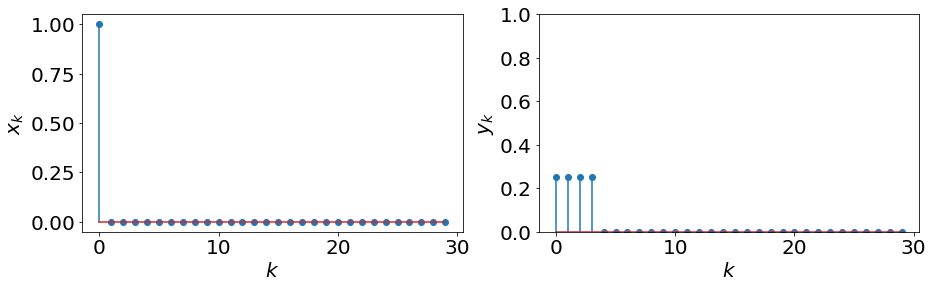

In [29]:
# FILTRAGE: moyenne mobile
# input= Dirac
#https://jupyterbook.org/en/stable/content/executable/output-insert.html?highlight=glue#the-glue-role-directive
x = np.array([1., 0., 0., 0.])

a = np.array([1.0])

m = 4
b = 1/m*np.ones(m)

x = np.zeros(30); x[0]=1

y=signal.lfilter(b, a, x)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].stem(x)
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$x_k$')
ax[1].stem(y)
ax[1].set_ylabel(r'$y_k$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylim([0,1])
plt.subplots_adjust(hspace=0.8)
glue("fig_filter_sliding_window", fig, display=False)

<ipython-input-32-cdc58ab49bdb>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[0].stem(x)
<ipython-input-32-cdc58ab49bdb>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[1].stem(y)


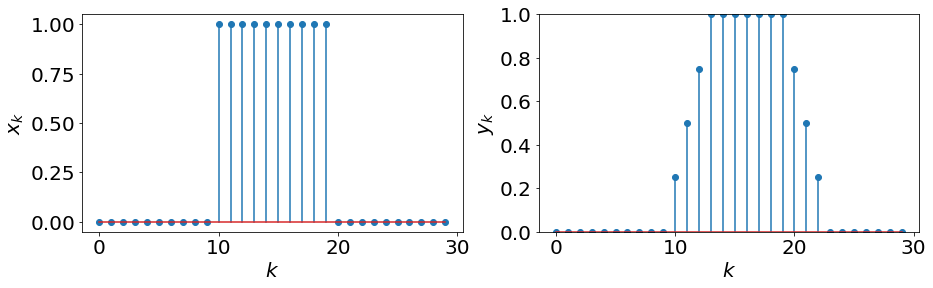

In [32]:
# FILTRAGE: moyenne mobile
# input= créneau
#https://jupyterbook.org/en/stable/content/executable/output-insert.html?highlight=glue#the-glue-role-directive
x = np.array([1., 0., 0., 0.])

a = np.array([1.0])

m = 4
b = 1/m*np.ones(m)

x = np.zeros(30); x[10:20]=1

y=signal.lfilter(b, a, x)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].stem(x)
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$x_k$')
ax[1].stem(y)
ax[1].set_ylabel(r'$y_k$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylim([0,1])
plt.subplots_adjust(hspace=0.8)
glue("fig_filter_sliding_window_gate", fig, display=False)

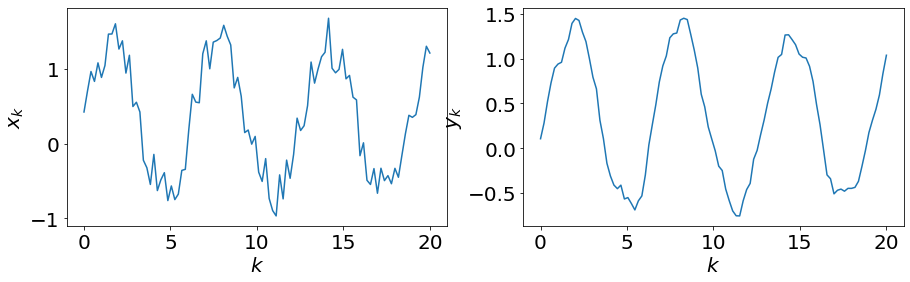

In [39]:
# FILTRAGE: moyenne mobile
# input= sinus + bruit
#https://jupyterbook.org/en/stable/content/executable/output-insert.html?highlight=glue#the-glue-role-directive
x = np.array([1., 0., 0., 0.])

a = np.array([1.0])

m = 4
b = 1/m*np.ones(m)

n=100
t=np.linspace(0,20,n)
x = np.sin(t)+0.7*np.random.rand(n)

y=signal.lfilter(b, a, x)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(t,x)
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$x_k$')
ax[1].plot(t,y)
ax[1].set_ylabel(r'$y_k$')
ax[1].set_xlabel(r'$k$')
#ax[1].set_ylim([0,1])
plt.subplots_adjust(hspace=0.8)
glue("fig_filter_sliding_window_sine", fig, display=False)

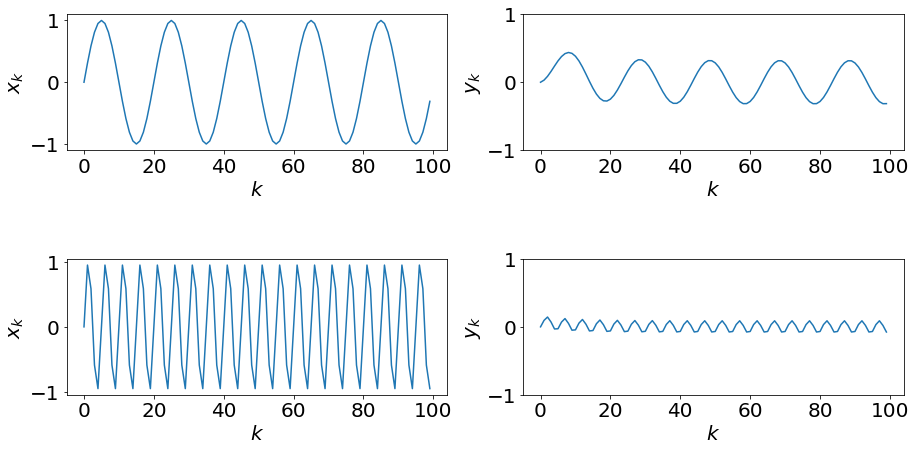

In [30]:
# FILTRAGE: passe bas
# input= sinus

a = np.array([1.0, -0.9])
b = np.array([.1])

n=100
t=np.arange(n)

fig,ax = plt.subplots(2,2,figsize=(15,7))
w_l = [2*np.pi*0.05,2*np.pi*0.2]

i=0
for w in w_l:
    x = np.sin(w *t) #+0.7*np.random.rand(n)
    y=signal.lfilter(b, a, x)
    
    ax[i,0].plot(t,x)
    ax[i,0].set_xlabel(r'$k$')
    ax[i,0].set_ylabel(r'$x_k$')
    ax[i,1].plot(t,y)
    ax[i,1].set_ylabel(r'$y_k$')
    ax[i,1].set_xlabel(r'$k$')
    ax[i,1].set_ylim([-1,1])
    i+=1 


plt.subplots_adjust(hspace=0.8)
plt.show()
glue("fig_filter_lowpass", fig, display=False)

Text(0.5, 0, 'Frequency [rad/sample]')

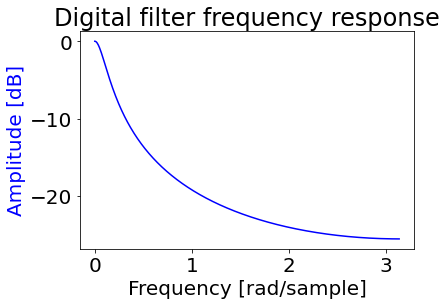

In [14]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html#scipy.signal.freqz
w, h = signal.freqz(b,a)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
glue("fig_filter_lowpass_freqz", fig, display=False)

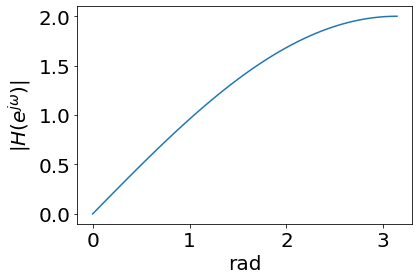

In [4]:
# FILTRE DERIVATEUR
fig, ax = plt.subplots()
x= np.linspace(0,np.pi)
ax.plot(x , 2*np.sin(x/2))
ax.set_xlabel('rad')
ax.set_ylabel(r'$\vert H(e^{j\omega})\vert$')
glue("fig_filter_derivative", fig, display=False)